# Self-Organizing Maps

In [14]:
# Import librairies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from minisom import MiniSom
from pylab import bone, pcolor, colorbar, plot, show
from sklearn.preprocessing import MinMaxScaler

In [5]:
# Datas importation
dataset = pd.read_csv('Credit_Card_Applications.csv')
dataset.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [6]:
dataset.shape

(690, 16)

In [7]:
# Split dataset 
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [8]:
print(X[0])
print(y[0])

[1.5776156e+07 1.0000000e+00 2.2080000e+01 1.1460000e+01 2.0000000e+00
 4.0000000e+00 4.0000000e+00 1.5850000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 1.0000000e+00 2.0000000e+00 1.0000000e+02 1.2130000e+03]
0


In [9]:
# Scaling
sc = MinMaxScaler()
X = sc.fit_transform(X)

In [10]:
X[0]

array([0.84268147, 1.        , 0.12526316, 0.40928571, 0.5       ,
       0.23076923, 0.375     , 0.05561404, 0.        , 0.        ,
       0.        , 1.        , 0.5       , 0.05      , 0.01212   ])

In [11]:
# Som object init
som = MiniSom(x=10, y=10, input_len=15, random_seed=42)

In [12]:
# Random weights init
som.random_weights_init(X)

In [13]:
# Training model
som.train_random(X, num_iteration=100)

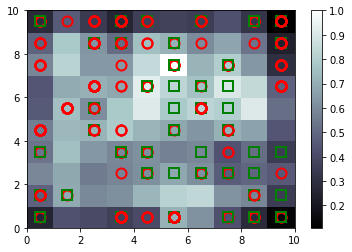

In [15]:
# Results visualization
bone()
pcolor(som.distance_map().T)
colorbar()

markers = ['o', 's']
colors = ['r', 'g']

for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5, w[1] + 0.5,
        markers[y[i]],
        markeredgecolor = colors[y[i]],
        markerfacecolor = 'None',
        markersize = 10,
        markeredgewidth = 2)

show()

In [18]:
# Frauds detection
mappings = som.win_map(X)

frauds = np.concatenate((mappings[(4, 6)], mappings[(5, 7)]), axis=0)

frauds = sc.inverse_transform(frauds)
frauds

array([[1.5786237e+07, 0.0000000e+00, 1.9170000e+01, 5.8500000e-01,
        1.0000000e+00, 6.0000000e+00, 4.0000000e+00, 5.8500000e-01,
        1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        2.0000000e+00, 1.6000000e+02, 1.0000000e+00],
       [1.5590434e+07, 0.0000000e+00, 2.5000000e+01, 8.7500000e-01,
        2.0000000e+00, 1.4000000e+01, 8.0000000e+00, 1.0400000e+00,
        1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        2.0000000e+00, 1.6000000e+02, 5.8610000e+03],
       [1.5767358e+07, 0.0000000e+00, 4.9830000e+01, 1.3585000e+01,
        2.0000000e+00, 4.0000000e+00, 8.0000000e+00, 8.5000000e+00,
        1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        2.0000000e+00, 0.0000000e+00, 1.0000000e+00],
       [1.5671014e+07, 0.0000000e+00, 2.5330000e+01, 2.0850000e+00,
        2.0000000e+00, 8.0000000e+00, 8.0000000e+00, 2.7500000e+00,
        1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        2.0000000e+00,

In [29]:
fraudsters_list = []

for i in range(frauds.shape[0]):
    fraudsters_list.append(frauds[i][0])
    
fraudsters_list

[15786237.0,
 15590434.0,
 15767358.0,
 15671014.0,
 15642336.0,
 15740487.0,
 15593345.0,
 15811742.0,
 15702571.0,
 15622083.0,
 15646190.0,
 15715907.0,
 15768342.0,
 15748532.0,
 15689692.0,
 15672357.0,
 15788634.0,
 15766183.0,
 15808662.0,
 15684722.0,
 15772329.0,
 15734649.0,
 15646082.0,
 15717629.0,
 15757188.0,
 15635598.0,
 15647191.0,
 15776545.0,
 15792107.0,
 15623369.0,
 15793896.0,
 15650591.0,
 15813192.0,
 15633608.0,
 15675450.0]